# Version 1 note:
- Features used are: month number, day of week, holiday flag, genre, area name, is weekend
- Data transformation method: Label Encoding
- Model used: Random Forest Regressor 

# Import Packages

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

%matplotlib inline

# Import Data 

In [141]:
# data folder name
DATA_FOLDER_NAME = 'data/'

# submissions folder name
SUB_FOLDER_NAME = 'submissions/'

# import visitor data
air_visit_data = pd.read_csv(DATA_FOLDER_NAME + 'air_visit_data.csv')

# import air info and date info data
air_store_info = pd.read_csv(DATA_FOLDER_NAME + 'air_store_info.csv')
date_info = pd.read_csv(DATA_FOLDER_NAME + 'date_info.csv')

# import sample submission (use for testing)
submission = pd.read_csv(DATA_FOLDER_NAME + 'sample_submission.csv')

# Preprocessing Data

### Features to include
- month number
- day of week
- holiday flag
- genre
- area name
- is weekend

In [142]:
# adjust the submission file (that will be use to predict and submit) to match the air_visit data
submission['air_store_id'] = submission['id'].str.slice(0, 20)
submission['visit_date'] = submission['id'].str.slice(21)
submission['visitors'] = np.nan
submission['is_for_submission'] = 1

submission.head()

,id,visitors,air_store_id,visit_date,is_for_submission
0,air_00a91d42b08b08d9_2017-04-23,NaN,air_00a91d42b08b08d9,2017-04-23,1
1,air_00a91d42b08b08d9_2017-04-24,NaN,air_00a91d42b08b08d9,2017-04-24,1
2,air_00a91d42b08b08d9_2017-04-25,NaN,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,NaN,air_00a91d42b08b08d9,2017-04-26,1
4,air_00a91d42b08b08d9_2017-04-27,NaN,air_00a91d42b08b08d9,2017-04-27,1


In [143]:
 # join both the air visit data and submission records
air_visit_data['is_for_submission'] = 0
full_data = pd.concat((air_visit_data, submission.drop('id',axis='columns')))

c:\program files\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
# full data size
full_data.shape

(284127, 4)

In [145]:
full_data.head()

,air_store_id,is_for_submission,visit_date,visitors
0,air_ba937bf13d40fb24,0,2016-01-13,25.0
1,air_ba937bf13d40fb24,0,2016-01-14,32.0
2,air_ba937bf13d40fb24,0,2016-01-15,29.0
3,air_ba937bf13d40fb24,0,2016-01-16,22.0
4,air_ba937bf13d40fb24,0,2016-01-18,6.0


In [146]:
# add store info and date info into the data

# rename calendar date to visit date
date_info.rename(columns={'calendar_date': 'visit_date'}, inplace=True)

# join 2 tables
full_data = pd.merge(left=full_data, right=date_info, on='visit_date', how='left')
full_data = pd.merge(left=full_data, right=air_store_info, on='air_store_id', how='left')

full_data.head()

,air_store_id,is_for_submission,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,0,2016-01-13,25.0,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,0,2016-01-14,32.0,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,0,2016-01-15,29.0,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,0,2016-01-16,22.0,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,0,2016-01-18,6.0,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


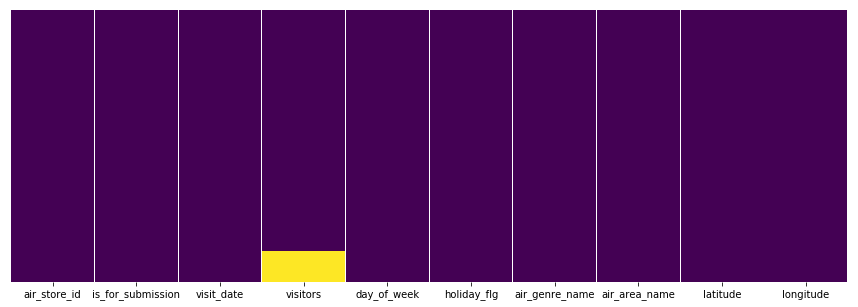

In [147]:
# use heatmap to check if there's any null values apart from visitors, where in submission record, is null value
# * yellow indicate null
plt.figure(figsize=(15,5))
sns.heatmap(full_data.isnull(),yticklabels=False, cbar=False, cmap ='viridis')


In [148]:
# get the month number, is_weekend
full_data['month_number'] = pd.to_datetime(full_data.visit_date).dt.month
full_data['is_weekend'] = full_data['day_of_week'].isin(['Saturday','Sunday']).astype(int)

In [149]:
full_data.head()

,air_store_id,is_for_submission,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,month_number,is_weekend
0,air_ba937bf13d40fb24,0,2016-01-13,25.0,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1,0
1,air_ba937bf13d40fb24,0,2016-01-14,32.0,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1,0
2,air_ba937bf13d40fb24,0,2016-01-15,29.0,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1,0
3,air_ba937bf13d40fb24,0,2016-01-16,22.0,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1,1
4,air_ba937bf13d40fb24,0,2016-01-18,6.0,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1,0


# Transform Data

In [150]:
# label encoder
lbl = preprocessing.LabelEncoder()

In [151]:
# transform string categorical columns into numeric categorical columns
full_data['day_of_week'] = lbl.fit_transform(full_data['day_of_week'])
full_data['air_genre_name'] = lbl.fit_transform(full_data['air_genre_name'])
full_data['air_area_name'] = lbl.fit_transform(full_data['air_area_name'])

In [152]:
# split into train data, test data, and data to submit
submit_data = full_data[full_data['is_for_submission']==1]
train_test_data = full_data[full_data['is_for_submission']==0]

In [153]:
# drop unwanted columns
columns_to_drop = ['air_store_id', 'is_for_submission','visit_date','latitude','longitude']

# drop the columns
submit_data = submit_data.drop(columns_to_drop, axis=1)
train_test_data = train_test_data.drop(columns_to_drop, axis=1)

In [154]:
train_test_data.head()

,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,month_number,is_weekend
0,25.0,6,0,4,62,1,0
1,32.0,4,0,4,62,1,0
2,29.0,0,0,4,62,1,0
3,22.0,2,0,4,62,1,1
4,6.0,1,0,4,62,1,0


In [155]:
# get X (features) and y (to predict) from train test data
X = train_test_data.drop('visitors', axis=1)
y = train_test_data['visitors']

In [156]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# submit data for testing
X_submit_test = submit_data.drop('visitors', axis=1)

In [157]:
# training size
X_train.shape

(201686, 6)

In [158]:
# test size
X_test.shape

(50422, 6)

# Model to predict


### Random Forest 

In [159]:
# function to calculate RMSLE (Root Mean Square Logarithmic Error)
def RMSLE(y_actual, y_pred) : 
    assert len(y_actual) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_actual))**2))

In [160]:
# random forest regressor
rfc = RandomForestRegressor(n_estimators=100)

In [168]:
# train the data with Random Forest
rfc.fit(X_train, y_train)

# predict the test data with the model
prediction = rfc.predict(X_test)

# calculate the RMSLE
rmsle_score = RMSLE(y_test.values, prediction)
print('RMSLE for Random Forest: ', rmsle_score)

RMSLE for Random Forest:  0.7598779804745871


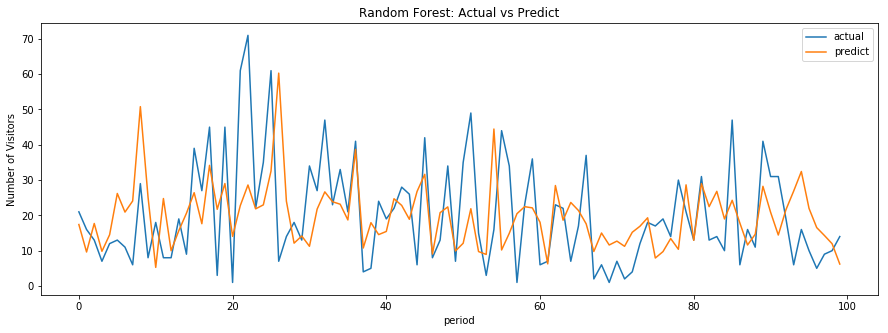

In [162]:
# predict vs actual
# store into dataframe
actual_df = y_test.to_frame().reset_index()
actual_df['index'] = actual_df.index
predict_df = pd.DataFrame(prediction).reset_index()

# top n to display on the plot
n_resu = 100

# plot the first n results
plt.figure(figsize=(15,5))
plt.plot(actual_df['index'].head(n_resu), actual_df['visitors'].head(n_resu), label='actual')
plt.plot(predict_df['index'].head(n_resu), predict_df[0].head(n_resu), label='predict')
plt.ylabel('Number of Visitors')
plt.xlabel('period')
plt.title('Random Forest: Actual vs Predict')
plt.legend(loc='best')

# Important Features 

In [169]:
# show the important features

# convert proportions into dataframe
important_feat_resu = pd.DataFrame(rfc.feature_importances_).reset_index()

# create important features dataframe
important_feat = pd.DataFrame(list(X))
important_feat['proportion'] = important_feat_resu[0]

# rename features
important_feat.rename(columns={0: 'features'}, inplace=True)


important_feat

,features,proportion
0,day_of_week,0.098301
1,holiday_flg,0.025826
2,air_genre_name,0.208485
3,air_area_name,0.377387
4,month_number,0.227091
5,is_weekend,0.062911


Text(0.5, 1.0, 'Important Features')

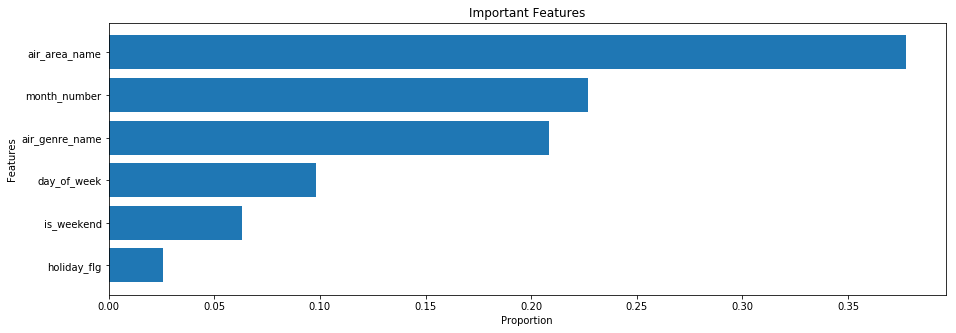

In [170]:
# sort the proportion by descending
important_feat = important_feat.sort_values(by='proportion', ascending=False)

plt.figure(figsize=(15,5))
plt.barh(important_feat['features'],important_feat['proportion'])
plt.gca().invert_yaxis()
plt.xlabel('Proportion')
plt.ylabel('Features')
plt.title('Important Features')


# Test with the submission data 

In [171]:
# test with the submission data
submit_prediction = rfc.predict(X_submit_test)

In [172]:
# convert submit prediction to dataframe
submit_pred_df = pd.DataFrame(submit_prediction).reset_index()

# add results the submission sample file
sub = pd.DataFrame()
sub['id'] = submission['id']
sub['visitors'] = submit_pred_df[0]

In [173]:
# save results into csv file
sub.to_csv(SUB_FOLDER_NAME + 'rf_rmsle_{:.5f}_v1.csv'.format(rmsle_score), index=False)